In [1]:
!pip install pandas
    
import pandas as pd
import numpy as np
pd.set_option('mode.copy_on_write', True)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from scipy.stats import wilcoxon

In [2]:
df = pd.read_excel('WWF_Media_Exploration.xlsx')
df

,Participant,Gender,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,...,O2 Like the post,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF,Tiger,Proboscis Monkey,Orangutan,Familiar species,Ranked aesthetics
0,1,Female,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,...,Very likely,Likely,Very likely,Very likely,Neither likely nor unlikely,0,40,20,Tiger;Proboscis Monkey;Orangutan;,Tiger;Orangutan;Proboscis Monkey;
1,2,Female,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,...,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,20,20,20,Tiger;Orangutan;,Orangutan;Tiger;Proboscis Monkey;
2,3,Male,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,...,Likely,Likely,Very likely,Likely,Very likely,20,10,30,Tiger;Proboscis Monkey;Orangutan;,Orangutan;Proboscis Monkey;Tiger;
3,4,Female,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,...,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Proboscis Monkey;Orangutan;
4,5,Non-binary,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,...,Likely,Unlikely,Likely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;,Tiger;Proboscis Monkey;Orangutan;
5,6,Female,18-24,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Agree,...,Very unlikely,Very unlikely,Unlikely,Unlikely,Unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Orangutan;Proboscis Monkey;
6,7,Female,18-24,White,Somewhat informed,Uninformed,Uninformed,Uninformed,Uninformed,Neither agree nor disagree,...,Likely,Unlikely,Unlikely,Unlikely,Very unlikely,40,10,10,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;
7,8,Female,55-64,White,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Agree,...,Very unlikely,Very unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,20,20,20,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;
8,9,Female,45-54,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Strongly agree,...,Unlikely,Very unlikely,Unlikely,Very unlikely,Very unlikely,0,10,50,Proboscis Monkey;Orangutan;,Orangutan;Tiger;Proboscis Monkey;
9,10,Female,18-24,"Black, Black British, Carribean or African",Very well informed,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Disagree,...,Very likely,Likely,Likely,Likely,Very unlikely,15,15,30,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;


In [3]:
t1_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'T1 Empathy', 'T1 Fear', 'T1 Sad', 'T1 Surprised',
                       'T1 Anxious', 'T1 Angry', 'T1 Guilty', 'T1 Content', 'T1 Relaxed', 'T1 Empowered', 'T1 Like the post',
                       'T1 Share the post', 'T1 Research the campaign', 'T1 Visit the WWF website', 'T1 Donate to the WWF']]

t2_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'T2 Empathy', 'T2 Fear', 'T2 Sad', 'T2 Surprised',
                       'T2 Anxious', 'T2 Angry', 'T2 Guilty', 'T2 Content', 'T2 Relaxed', 'T2 Empowered', 'T2 Like the post',
                       'T2 Share the post', 'T2 Research the campaign', 'T2 Visit the WWF website', 'T2 Donate to the WWF']]

pm1_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'PM1 Empathy', 'PM1 Fear', 'PM1 Sad', 'PM1 Surprised',
                       'PM1 Anxious', 'PM1 Angry', 'PM1 Guilty', 'PM1 Content', 'PM1 Relaxed', 'PM1 Empowered', 'PM1 Like the post',
                       'PM1 Share the post', 'PM1 Research the campaign', 'PM1 Visit the WWF website', 'PM1 Donate to the WWF']]

pm2_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'PM2 Empathy', 'PM2 Fear', 'PM2 Sad', 'PM2 Surprised',
                       'PM2 Anxious', 'PM2 Angry', 'PM2 Guilty', 'PM2 Content', 'PM2 Relaxed', 'PM2 Empowered', 'PM2 Like the post',
                       'PM2 Share the post', 'PM2 Research the campaign', 'PM2 Visit the WWF website', 'PM2 Donate to the WWF']]

o1_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'O1 Empathy', 'O1 Fear', 'O1 Sad', 'O1 Surprised',
                       'O1 Anxious', 'O1 Angry', 'O1 Guilty', 'O1 Content', 'O1 Relaxed', 'O1 Empowered', 'O1 Like the post',
                       'O1 Share the post', 'O1 Research the campaign', 'O1 Visit the WWF website', 'O1 Donate to the WWF']]

o2_media = df[['Participant', 'Age Group', 'Ethnicity', 'Climate change', 'Biodiversity loss', 'Species conservation', 
                       'Habitat conservation', 'WWF conservation efforts', 'O2 Empathy', 'O2 Fear', 'O2 Sad', 'O2 Surprised',
                       'O2 Anxious', 'O2 Angry', 'O2 Guilty', 'O2 Content', 'O2 Relaxed', 'O2 Empowered', 'O2 Like the post',
                       'O2 Share the post', 'O2 Research the campaign', 'O2 Visit the WWF website', 'O2 Donate to the WWF']]

In [4]:
o2_media


,Participant,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,O2 Empathy,O2 Fear,...,O2 Angry,O2 Guilty,O2 Content,O2 Relaxed,O2 Empowered,O2 Like the post,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF
0,1,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Strongly agree,Agree,...,Agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Very likely,Likely,Very likely,Very likely,Neither likely nor unlikely
1,2,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,Neither agree nor disagree,...,Agree,Disagree,Disagree,Disagree,Disagree,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely
2,3,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Strongly agree,Neither agree nor disagree,...,Strongly agree,Agree,Disagree,Disagree,Disagree,Likely,Likely,Very likely,Likely,Very likely
3,4,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,Strongly disagree,...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely
4,5,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,Neither agree nor disagree,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Likely,Unlikely,Likely,Unlikely,Very unlikely
5,6,18-24,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Agree,Neither agree nor disagree,...,Disagree,Disagree,Disagree,Disagree,Disagree,Very unlikely,Very unlikely,Unlikely,Unlikely,Unlikely
6,7,18-24,White,Somewhat informed,Uninformed,Uninformed,Uninformed,Uninformed,Agree,Neither agree nor disagree,...,Agree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Likely,Unlikely,Unlikely,Unlikely,Very unlikely
7,8,55-64,White,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Agree,Agree,...,Neither agree nor disagree,Disagree,Disagree,Disagree,Disagree,Very unlikely,Very unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely
8,9,45-54,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Strongly agree,Strongly disagree,...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Unlikely,Very unlikely,Unlikely,Very unlikely,Very unlikely
9,10,18-24,"Black, Black British, Carribean or African",Very well informed,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Agree,Agree,...,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Very likely,Likely,Likely,Likely,Very unlikely


In [5]:
t1_counts = t1_media['T1 Empathy'].value_counts()
t2_counts = t2_media['T2 Empathy'].value_counts()
t_empathy_comparison = pd.concat([t1_counts, t2_counts], axis=1).fillna(0)
t_empathy_comparison.columns = ['T1 Empathy', 'T2 Empathy']
print(t_empathy_comparison)

                            T1 Empathy  T2 Empathy
Agree                               30          28
Strongly agree                      10           7
Neither agree nor disagree           7          10
Disagree                             2           3
Strongly disagree                    1           2


In [6]:
pm1_counts = pm1_media['PM1 Empathy'].value_counts()
pm2_counts = pm2_media['PM2 Empathy'].value_counts()
pm_empathy_comparison = pd.concat([pm1_counts, pm2_counts], axis=1).fillna(0)
pm_empathy_comparison.columns = ['PM1 Empathy', 'PM2 Empathy']
print(pm_empathy_comparison)

                            PM1 Empathy  PM2 Empathy
Agree                                21           25
Neither agree nor disagree           10            7
Strongly agree                        8            8
Disagree                              7            5
Strongly disagree                     4            5


In [7]:
o1_counts = o1_media['O1 Empathy'].value_counts()
o2_counts = o2_media['O2 Empathy'].value_counts()
o_empathy_comparison = pd.concat([o1_counts, o2_counts], axis=1).fillna(0)
o_empathy_comparison.columns = ['O1 Empathy', 'O2 Empathy']
print(o_empathy_comparison)

                            O1 Empathy  O2 Empathy
Agree                               29        32.0
Strongly agree                      12        15.0
Neither agree nor disagree           6         0.0
Strongly disagree                    2         2.0
Disagree                             1         1.0


In [8]:
o1_counts = o1_media['O1 Guilty'].value_counts()
o2_counts = o2_media['O2 Guilty'].value_counts()
o_guilty_comparison = pd.concat([o1_counts, o2_counts], axis=1).fillna(0)
o_guilty_comparison.columns = ['O1 Guilty', 'O2 Guilty']
print(o_guilty_comparison)

                            O1 Guilty  O2 Guilty
Neither agree nor disagree         18          9
Agree                              16         15
Disagree                           10         16
Strongly disagree                   5          6
Strongly agree                      1          4


In [9]:
empathy_diff = t1_media['T1 Empathy'].astype('category').cat.codes - t2_media['T2 Empathy'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(empathy_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 177.0
p-value: 0.7698975028395627


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [10]:
empathy_diff = pm1_media['PM1 Empathy'].astype('category').cat.codes - pm2_media['PM2 Empathy'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(empathy_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 106.0
p-value: 0.7361095341052009


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [11]:
empathy_diff = o1_media['O1 Empathy'].astype('category').cat.codes - o2_media['O2 Empathy'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(empathy_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 99.5
p-value: 0.04848291569649906


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [12]:
guilty_diff = o1_media['O1 Guilty'].astype('category').cat.codes - o2_media['O2 Guilty'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(guilty_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 66.0
p-value: 0.9121171716060761


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [13]:
sad_diff = o1_media['O1 Sad'].astype('category').cat.codes - o2_media['O2 Sad'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(sad_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 70.0
p-value: 0.7554416810317752


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [14]:
surprised_diff = pm1_media['PM1 Surprised'].astype('category').cat.codes - pm2_media['PM2 Surprised'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(surprised_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 82.5
p-value: 0.3927575368092272


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [15]:
sad_diff = pm1_media['PM1 Sad'].astype('category').cat.codes - pm2_media['PM2 Sad'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(sad_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 72.0
p-value: 0.8284464068254641


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [16]:
pm1_counts = pm1_media['PM1 Sad'].value_counts()
pm2_counts = pm2_media['PM2 Sad'].value_counts()
pm_sad_comparison = pd.concat([pm1_counts, pm2_counts], axis=1).fillna(0)
pm_sad_comparison.columns = ['PM1 Sad', 'PM2 Sad']
print(pm_sad_comparison)

                            PM1 Sad  PM2 Sad
Agree                            22       26
Neither agree nor disagree       11       12
Disagree                          7        1
Strongly agree                    5        7
Strongly disagree                 5        4


In [17]:
anxious_diff = pm1_media['PM1 Anxious'].astype('category').cat.codes - pm2_media['PM2 Anxious'].astype('category').cat.codes

# Perform Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(anxious_diff)

# Print the results
print("Wilcoxon Signed-Rank Statistic:", statistic)
print("p-value:", pvalue)

Wilcoxon Signed-Rank Statistic: 90.5
p-value: 0.137877588299596


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [18]:
emotions = ['Empathy', 'Fear', 'Sad', 'Surprised', 'Anxious', 
            'Angry', 'Guilty', 'Content', 'Relaxed', 'Empowered']

for emotion in emotions:
  wildlife_score = t1_media[f'T1 {emotion}'].astype('category').cat.codes
  portraiture_score = t2_media[f'T2 {emotion}'].astype('category').cat.codes

  # Perform Wilcoxon signed-rank test
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  # Print results for the current emotion
  print(f"Emotion: {emotion}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  # Optional line for visual separation

Emotion: Empathy
Wilcoxon Signed-Rank Statistic: 177.0
p-value: 0.7698975028395627
--------------------
Emotion: Fear
Wilcoxon Signed-Rank Statistic: 114.5
p-value: 0.30305447046467715
--------------------
Emotion: Sad
Wilcoxon Signed-Rank Statistic: 110.0
p-value: 0.5866016196388331
--------------------
Emotion: Surprised
Wilcoxon Signed-Rank Statistic: 61.5
p-value: 0.09400764935678217
--------------------
Emotion: Anxious
Wilcoxon Signed-Rank Statistic: 98.0
p-value: 0.07530676849746742
--------------------
Emotion: Angry
Wilcoxon Signed-Rank Statistic: 98.0
p-value: 0.21440569960546552
--------------------
Emotion: Guilty
Wilcoxon Signed-Rank Statistic: 76.5
p-value: 0.16929808985008243
--------------------
Emotion: Content
Wilcoxon Signed-Rank Statistic: 142.5
p-value: 0.577724763087084
--------------------
Emotion: Relaxed
Wilcoxon Signed-Rank Statistic: 107.0
p-value: 0.04292284862791472
--------------------
Emotion: Empowered
Wilcoxon Signed-Rank Statistic: 114.0
p-value: 1.541

C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not 

In [19]:
emotions = ['Empathy', 'Fear', 'Sad', 'Surprised', 'Anxious', 
            'Angry', 'Guilty', 'Content', 'Relaxed', 'Empowered']

for emotion in emotions:
  wildlife_score = pm1_media[f'PM1 {emotion}'].astype('category').cat.codes
  portraiture_score = pm2_media[f'PM2 {emotion}'].astype('category').cat.codes

  # Perform Wilcoxon signed-rank test
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  # Print results for the current emotion
  print(f"Emotion: {emotion}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  # Optional line for visual separation

Emotion: Empathy
Wilcoxon Signed-Rank Statistic: 106.0
p-value: 0.7361095341052009
--------------------
Emotion: Fear
Wilcoxon Signed-Rank Statistic: 136.0
p-value: 0.4545716405999586
--------------------
Emotion: Sad
Wilcoxon Signed-Rank Statistic: 72.0
p-value: 0.8284464068254641
--------------------
Emotion: Surprised
Wilcoxon Signed-Rank Statistic: 82.5
p-value: 0.3927575368092272
--------------------
Emotion: Anxious
Wilcoxon Signed-Rank Statistic: 90.5
p-value: 0.137877588299596
--------------------
Emotion: Angry
Wilcoxon Signed-Rank Statistic: 217.5
p-value: 0.7485663024661495
--------------------
Emotion: Guilty
Wilcoxon Signed-Rank Statistic: 57.0
p-value: 0.8613705635701895
--------------------
Emotion: Content
Wilcoxon Signed-Rank Statistic: 64.0
p-value: 0.5412403529394884
--------------------
Emotion: Relaxed
Wilcoxon Signed-Rank Statistic: 188.5
p-value: 0.7294544477141365
--------------------
Emotion: Empowered
Wilcoxon Signed-Rank Statistic: 43.5
p-value: 0.88418079355

C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not 

In [20]:
emotions = ['Empathy', 'Fear', 'Sad', 'Surprised', 'Anxious', 
            'Angry', 'Guilty', 'Content', 'Relaxed', 'Empowered']

for emotion in emotions:
  wildlife_score = o1_media[f'O1 {emotion}'].astype('category').cat.codes
  portraiture_score = o2_media[f'O2 {emotion}'].astype('category').cat.codes

  # Perform Wilcoxon signed-rank test
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  # Print results for the current emotion
  print(f"Emotion: {emotion}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  # Optional line for visual separation

Emotion: Empathy
Wilcoxon Signed-Rank Statistic: 99.5
p-value: 0.04848291569649906
--------------------
Emotion: Fear
Wilcoxon Signed-Rank Statistic: 109.5
p-value: 0.8299500445732405
--------------------
Emotion: Sad
Wilcoxon Signed-Rank Statistic: 70.0
p-value: 0.7554416810317752
--------------------
Emotion: Surprised
Wilcoxon Signed-Rank Statistic: 124.0
p-value: 0.10963722755449136
--------------------
Emotion: Anxious
Wilcoxon Signed-Rank Statistic: 52.5
p-value: 0.24759649824006236
--------------------
Emotion: Angry
Wilcoxon Signed-Rank Statistic: 58.5
p-value: 0.3883913261535328
--------------------
Emotion: Guilty
Wilcoxon Signed-Rank Statistic: 66.0
p-value: 0.9121171716060761
--------------------
Emotion: Content
Wilcoxon Signed-Rank Statistic: 107.5
p-value: 0.04220653152618409
--------------------
Emotion: Relaxed
Wilcoxon Signed-Rank Statistic: 32.0
p-value: 0.5714505727049992
--------------------
Emotion: Empowered
Wilcoxon Signed-Rank Statistic: 49.0
p-value: 0.5266618

C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not 

In [21]:
emotion_categories = {'Negative': ['Fear', 'Sad', 'Anxious', 'Angry'],
                      'Positive': ['Content', 'Relaxed', 'Empowered']} 

for category, emotions in emotion_categories.items():
  wildlife_category_score = t1_media[f'T1 {emotions[0]}'].astype('category').cat.codes 
  portraiture_category_score = t2_media[f'T2 {emotions[0]}'].astype('category').cat.codes

  
  for emotion in emotions[1:]:
    wildlife_category_score += t1_media[f'T1 {emotion}'].astype('category').cat.codes
    portraiture_category_score += t2_media[f'T2 {emotion}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Emotional Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  


Emotional Category: Negative
Wilcoxon Signed-Rank Statistic: 215.5
p-value: 0.5215777021361446
--------------------
Emotional Category: Positive
Wilcoxon Signed-Rank Statistic: 440.5
p-value: 0.37677892340827746
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [22]:
emotion_categories = {'Negative': ['Fear', 'Sad', 'Anxious', 'Angry'],
                      'Positive': ['Content', 'Relaxed', 'Empowered']} 

for category, emotions in emotion_categories.items():
  wildlife_category_score = pm1_media[f'PM1 {emotions[0]}'].astype('category').cat.codes 
  portraiture_category_score = pm2_media[f'PM2 {emotions[0]}'].astype('category').cat.codes

  
  for emotion in emotions[1:]:
    wildlife_category_score += pm1_media[f'PM1 {emotion}'].astype('category').cat.codes
    portraiture_category_score += pm2_media[f'PM2 {emotion}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Emotional Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  

Emotional Category: Negative
Wilcoxon Signed-Rank Statistic: 304.5
p-value: 0.8621952394122607
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Emotional Category: Positive
Wilcoxon Signed-Rank Statistic: 210.0
p-value: 0.6383175771971907
--------------------


In [23]:
emotion_categories = {'Negative': ['Fear', 'Sad', 'Anxious', 'Angry'],
                      'Positive': ['Content', 'Relaxed', 'Empowered']} 

for category, emotions in emotion_categories.items():
  wildlife_category_score = o1_media[f'O1 {emotions[0]}'].astype('category').cat.codes 
  portraiture_category_score = o2_media[f'O2 {emotions[0]}'].astype('category').cat.codes

  
  for emotion in emotions[1:]:
    wildlife_category_score += o1_media[f'O1 {emotion}'].astype('category').cat.codes
    portraiture_category_score += o2_media[f'O2 {emotion}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Emotional Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  

C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Emotional Category: Negative
Wilcoxon Signed-Rank Statistic: 235.0
p-value: 0.5856434961719705
--------------------
Emotional Category: Positive
Wilcoxon Signed-Rank Statistic: 171.0
p-value: 0.3114921700679194
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [24]:
engagement_measures = ['Like the post', 'Share the post', 'Research the campaign', 'Visit the WWF website', 'Donate to the WWF']

for measure in engagement_measures:
  wildlife_score = t1_media[f'T1 {measure}'].astype('category').cat.codes
  portraiture_score = t2_media[f'T2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  
  print(f"Engagement Measure: {measure}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)

C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Engagement Measure: Like the post
Wilcoxon Signed-Rank Statistic: 72.0
p-value: 0.12605351840976783
--------------------
Engagement Measure: Share the post
Wilcoxon Signed-Rank Statistic: 160.0
p-value: 0.041389404009149304
--------------------
Engagement Measure: Research the campaign
Wilcoxon Signed-Rank Statistic: 138.0
p-value: 0.07637967126406221
--------------------
Engagement Measure: Visit the WWF website
Wilcoxon Signed-Rank Statistic: 164.5
p-value: 0.056561177441165
--------------------
Engagement Measure: Donate to the WWF
Wilcoxon Signed-Rank Statistic: 44.0
p-value: 0.9141007028759488
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [25]:
engagement_measures = ['Like the post', 'Share the post', 'Research the campaign', 'Visit the WWF website', 'Donate to the WWF']

for measure in engagement_measures:
  wildlife_score = pm1_media[f'PM1 {measure}'].astype('category').cat.codes
  portraiture_score = pm2_media[f'PM2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  
  print(f"Engagement Measure: {measure}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)

Engagement Measure: Like the post
Wilcoxon Signed-Rank Statistic: 94.0
p-value: 0.9676237546220364
--------------------
Engagement Measure: Share the post
Wilcoxon Signed-Rank Statistic: 79.5
p-value: 0.5281177271982664
--------------------
Engagement Measure: Research the campaign
Wilcoxon Signed-Rank Statistic: 186.5
p-value: 0.7000248427104319
--------------------
Engagement Measure: Visit the WWF website
Wilcoxon Signed-Rank Statistic: 42.0
p-value: 0.08462461936699323
--------------------
Engagement Measure: Donate to the WWF
Wilcoxon Signed-Rank Statistic: 15.0
p-value: 0.36917141633269157
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not 

In [26]:
engagement_measures = ['Like the post', 'Share the post', 'Research the campaign', 'Visit the WWF website', 'Donate to the WWF']

for measure in engagement_measures:
  wildlife_score = o1_media[f'O1 {measure}'].astype('category').cat.codes
  portraiture_score = o2_media[f'O2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_score, portraiture_score)

  
  print(f"Engagement Measure: {measure}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)

Engagement Measure: Like the post
Wilcoxon Signed-Rank Statistic: 40.0
p-value: 0.24821307898992373
--------------------
Engagement Measure: Share the post
Wilcoxon Signed-Rank Statistic: 33.0
p-value: 0.21689273952339705
--------------------
Engagement Measure: Research the campaign
Wilcoxon Signed-Rank Statistic: 128.0
p-value: 0.752784132649847
--------------------
Engagement Measure: Visit the WWF website
Wilcoxon Signed-Rank Statistic: 126.5
p-value: 0.7037552435600076
--------------------
Engagement Measure: Donate to the WWF
Wilcoxon Signed-Rank Statistic: 27.5
p-value: 0.35986857621436574
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not 

In [27]:
engagement_categories = {
  'Direct Engagement': ['Like the post', 'Share the post'],
  'Indirect Engagement': ['Research the campaign', 'Visit the WWF website'],
  'Outcome Engagement': ['Donate to the WWF']}

for category, measures in engagement_categories.items():
  wildlife_category_score = t1_media[f'T1 {measures[0]}'].astype('category').cat.codes 
  portraiture_category_score = t2_media[f'T2 {measures[0]}'].astype('category').cat.codes

  
  for measure in measures[1:]:
    wildlife_category_score += t1_media[f'T1 {measure}'].astype('category').cat.codes
    portraiture_category_score += t2_media[f'T2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Engagement Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  

Engagement Category: Direct Engagement
Wilcoxon Signed-Rank Statistic: 314.5
p-value: 0.5714333519994172
--------------------
Engagement Category: Indirect Engagement
Wilcoxon Signed-Rank Statistic: 205.0
p-value: 0.0423739129996238
--------------------
Engagement Category: Outcome Engagement
Wilcoxon Signed-Rank Statistic: 44.0
p-value: 0.9141007028759488
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [28]:
engagement_categories = {
  'Direct Engagement': ['Like the post', 'Share the post'],
  'Indirect Engagement': ['Research the campaign', 'Visit the WWF website'],
  'Outcome Engagement': ['Donate to the WWF']}

for category, measures in engagement_categories.items():
  wildlife_category_score = pm1_media[f'PM1 {measures[0]}'].astype('category').cat.codes 
  portraiture_category_score = pm2_media[f'PM2 {measures[0]}'].astype('category').cat.codes

  
  for measure in measures[1:]:
    wildlife_category_score += pm1_media[f'PM1 {measure}'].astype('category').cat.codes
    portraiture_category_score += pm2_media[f'PM2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Engagement Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  

Engagement Category: Direct Engagement
Wilcoxon Signed-Rank Statistic: 130.0
p-value: 0.8068137337237374
--------------------
Engagement Category: Indirect Engagement
Wilcoxon Signed-Rank Statistic: 226.5
p-value: 0.9004025297786242
--------------------
Engagement Category: Outcome Engagement
Wilcoxon Signed-Rank Statistic: 15.0
p-value: 0.36917141633269157
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [29]:
engagement_categories = {
  'Direct Engagement': ['Like the post', 'Share the post'],
  'Indirect Engagement': ['Research the campaign', 'Visit the WWF website'],
  'Outcome Engagement': ['Donate to the WWF']}

for category, measures in engagement_categories.items():
  wildlife_category_score = o1_media[f'O1 {measures[0]}'].astype('category').cat.codes 
  portraiture_category_score = o2_media[f'O2 {measures[0]}'].astype('category').cat.codes

  
  for measure in measures[1:]:
    wildlife_category_score += o1_media[f'O1 {measure}'].astype('category').cat.codes
    portraiture_category_score += o2_media[f'O2 {measure}'].astype('category').cat.codes

  
  statistic, pvalue = wilcoxon(wildlife_category_score, portraiture_category_score)

  
  print(f"Engagement Category: {category}")
  print(f"Wilcoxon Signed-Rank Statistic: {statistic}")
  print(f"p-value: {pvalue}")
  print("-"*20)  

Engagement Category: Direct Engagement
Wilcoxon Signed-Rank Statistic: 47.0
p-value: 0.09181374394456715
--------------------
Engagement Category: Indirect Engagement
Wilcoxon Signed-Rank Statistic: 145.0
p-value: 0.8840647018167125
--------------------
Engagement Category: Outcome Engagement
Wilcoxon Signed-Rank Statistic: 27.5
p-value: 0.35986857621436574
--------------------


C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [30]:
knowledge_data = df[['Participant', 'Climate change', 'Biodiversity loss', 'Species conservation', 'Habitat conservation', 
                     'WWF conservation efforts']]
knowledge_data.head()

,Participant,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts
0,1,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed
1,2,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed
2,3,Quite informed,Well informed,Well informed,Well informed,Somewhat informed
3,4,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed
4,5,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed


In [31]:
knowledge_score_map = {
    "Uninformed": 1,
    "Somewhat informed": 2,
    "Quite informed": 3,
    "Well informed": 4,
    "Very well informed": 5
}

def map_knowledge_scores(row):
  """Maps categorical knowledge measures to numerical scores (1-5).

  Args:
      row: A row (Series) from the DataFrame containing categorical knowledge measures.

  Returns:
      A Series containing the corresponding numerical scores for each measure.
  """
  scores = row.replace(knowledge_score_map)
  return scores

# Apply the function to each row
knowledge_data = knowledge_data.apply(map_knowledge_scores, axis=1)
knowledge_data.head()


,Participant,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts
0,1,5,5,5,5,5
1,2,4,4,3,3,2
2,3,3,4,4,4,2
3,4,2,2,1,1,1
4,5,4,3,4,5,2


In [32]:
knowledge_measures = ['Climate change', 'Biodiversity loss', 'Species conservation', 'Habitat conservation', 'WWF conservation efforts']

knowledge_data['Knowledge score'] = knowledge_data[knowledge_measures].sum(axis=1)

knowledge_data.head()

,Participant,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,Knowledge score
0,1,5,5,5,5,5,25
1,2,4,4,3,3,2,16
2,3,3,4,4,4,2,17
3,4,2,2,1,1,1,7
4,5,4,3,4,5,2,18


In [33]:
df = pd.merge(df, knowledge_data[['Knowledge score', 'Participant']])
df

,Participant,Gender,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,...,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF,Tiger,Proboscis Monkey,Orangutan,Familiar species,Ranked aesthetics,Knowledge score
0,1,Female,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,...,Likely,Very likely,Very likely,Neither likely nor unlikely,0,40,20,Tiger;Proboscis Monkey;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,25
1,2,Female,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,...,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,20,20,20,Tiger;Orangutan;,Orangutan;Tiger;Proboscis Monkey;,16
2,3,Male,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,...,Likely,Very likely,Likely,Very likely,20,10,30,Tiger;Proboscis Monkey;Orangutan;,Orangutan;Proboscis Monkey;Tiger;,17
3,4,Female,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,...,Very unlikely,Unlikely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Proboscis Monkey;Orangutan;,7
4,5,Non-binary,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,...,Unlikely,Likely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;,Tiger;Proboscis Monkey;Orangutan;,18
5,6,Female,18-24,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Agree,...,Very unlikely,Unlikely,Unlikely,Unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Orangutan;Proboscis Monkey;,10
6,7,Female,18-24,White,Somewhat informed,Uninformed,Uninformed,Uninformed,Uninformed,Neither agree nor disagree,...,Unlikely,Unlikely,Unlikely,Very unlikely,40,10,10,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,6
7,8,Female,55-64,White,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Agree,...,Very unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,20,20,20,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,10
8,9,Female,45-54,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Strongly agree,...,Very unlikely,Unlikely,Very unlikely,Very unlikely,0,10,50,Proboscis Monkey;Orangutan;,Orangutan;Tiger;Proboscis Monkey;,10
9,10,Female,18-24,"Black, Black British, Carribean or African",Very well informed,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Disagree,...,Likely,Likely,Likely,Very unlikely,15,15,30,Tiger;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,14


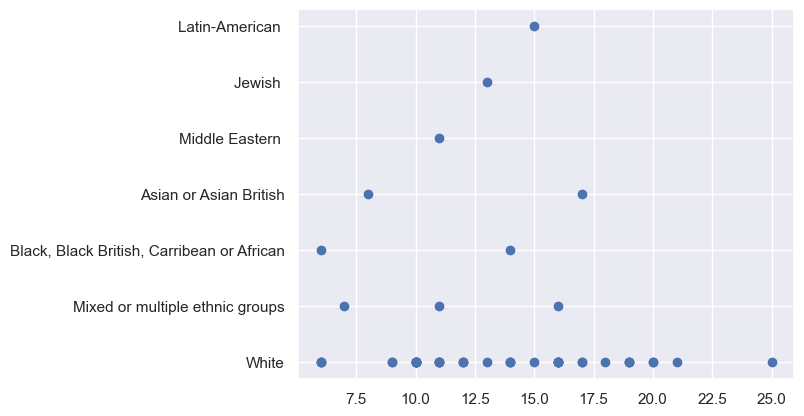

In [34]:
plt.scatter(df['Knowledge score'], df['Ethnicity'])

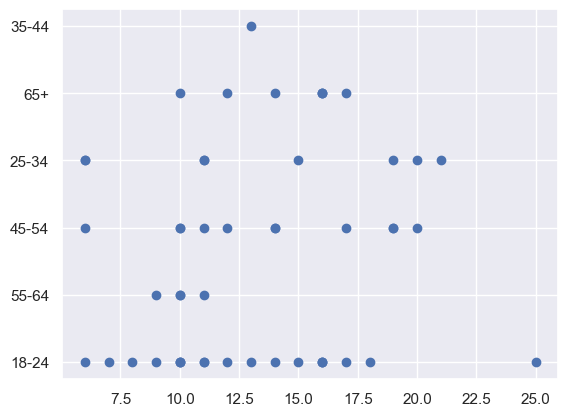

In [35]:
plt.scatter(df['Knowledge score'], df['Age Group'])

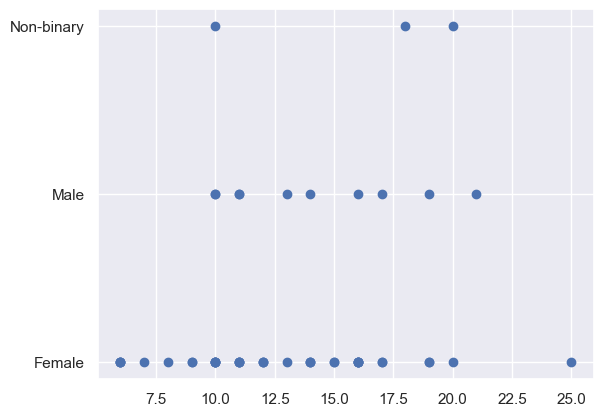

In [36]:
plt.scatter(df['Knowledge score'], df['Gender'])

In [37]:
empathy = df[['Participant', 'T1 Empathy', 'T2 Empathy', 'PM1 Empathy', 'PM2 Empathy', 'O1 Empathy', 'O2 Empathy']]
empathy.head()

,Participant,T1 Empathy,T2 Empathy,PM1 Empathy,PM2 Empathy,O1 Empathy,O2 Empathy
0,1,Agree,Strongly agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Strongly agree
1,2,Agree,Agree,Strongly agree,Agree,Strongly agree,Agree
2,3,Agree,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree
3,4,Agree,Agree,Neither agree nor disagree,Agree,Agree,Agree
4,5,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Agree


In [38]:
empathy_score_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}

def map_empathy_scores(row):
  """Maps categorical empathy scores to numerical scores (1-5).

  Args:
      row: A row (Series) from the DataFrame containing categorical empathy scores.

  Returns:
      A Series containing the corresponding numerical scores for each score.
  """
  scores = row.replace(empathy_score_map)
  return scores

# Apply the function to each row
empathy = empathy.apply(map_empathy_scores, axis=1)
empathy.head()


,Participant,T1 Empathy,T2 Empathy,PM1 Empathy,PM2 Empathy,O1 Empathy,O2 Empathy
0,1,4,5,3,4,3,5
1,2,4,4,5,4,5,4
2,3,4,4,4,3,4,5
3,4,4,4,3,4,4,4
4,5,4,3,4,4,3,4


In [39]:
empathy_measures = ['T1 Empathy','T2 Empathy', 'PM1 Empathy', 'PM2 Empathy', 'O1 Empathy', 'O2 Empathy']

empathy['Empathy score'] = empathy[empathy_measures].sum(axis=1)

empathy.head()

,Participant,T1 Empathy,T2 Empathy,PM1 Empathy,PM2 Empathy,O1 Empathy,O2 Empathy,Empathy score
0,1,4,5,3,4,3,5,24
1,2,4,4,5,4,5,4,26
2,3,4,4,4,3,4,5,24
3,4,4,4,3,4,4,4,23
4,5,4,3,4,4,3,4,22


In [40]:
df = pd.merge(df, empathy[['Empathy score', 'Participant']])
df.head()

,Participant,Gender,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,...,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF,Tiger,Proboscis Monkey,Orangutan,Familiar species,Ranked aesthetics,Knowledge score,Empathy score
0,1,Female,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,...,Very likely,Very likely,Neither likely nor unlikely,0,40,20,Tiger;Proboscis Monkey;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,25,24
1,2,Female,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,...,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,20,20,20,Tiger;Orangutan;,Orangutan;Tiger;Proboscis Monkey;,16,26
2,3,Male,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,...,Very likely,Likely,Very likely,20,10,30,Tiger;Proboscis Monkey;Orangutan;,Orangutan;Proboscis Monkey;Tiger;,17,24
3,4,Female,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,...,Unlikely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Proboscis Monkey;Orangutan;,7,23
4,5,Non-binary,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,...,Likely,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;,Tiger;Proboscis Monkey;Orangutan;,18,22


Correlation coefficient (r): 0.20716912864037518


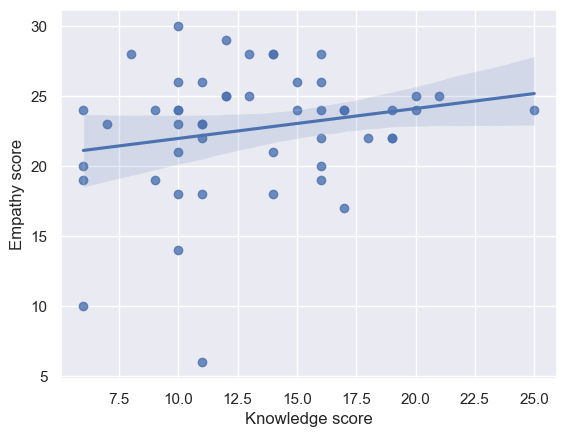

In [41]:
sns.regplot(x="Knowledge score", y="Empathy score", data=df)

corr_matrix = np.corrcoef((df['Knowledge score'], df['Empathy score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

In [42]:
wildlife_engagement = df[['Participant', 'T1 Like the post', 'T1 Share the post', 'T1 Research the campaign', 'T1 Visit the WWF website', 
                          'T1 Donate to the WWF', 'PM1 Like the post', 'PM1 Share the post', 'PM1 Research the campaign',
                          'PM1 Visit the WWF website', 'PM1 Donate to the WWF', 'O1 Like the post', 'O1 Share the post',
                          'O1 Research the campaign', 'O1 Visit the WWF website', 'O1 Donate to the WWF']]
wildlife_engagement.head()

,Participant,T1 Like the post,T1 Share the post,T1 Research the campaign,T1 Visit the WWF website,T1 Donate to the WWF,PM1 Like the post,PM1 Share the post,PM1 Research the campaign,PM1 Visit the WWF website,PM1 Donate to the WWF,O1 Like the post,O1 Share the post,O1 Research the campaign,O1 Visit the WWF website,O1 Donate to the WWF
0,1,Likely,Very unlikely,Unlikely,Unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely,Unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely
1,2,Very likely,Likely,Neither likely nor unlikely,Unlikely,Unlikely,Very likely,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,Very likely,Likely,Likely,Neither likely nor unlikely,Unlikely
2,3,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Very likely,Very likely,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Very likely,Very likely,Likely,Neither likely nor unlikely,Neither likely nor unlikely
3,4,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely
4,5,Likely,Unlikely,Very unlikely,Very unlikely,Very unlikely,Likely,Unlikely,Very unlikely,Very unlikely,Very unlikely,Likely,Unlikely,Very unlikely,Very unlikely,Very unlikely


In [43]:
engagement_score_map = {
    "Very unlikely": 1,
    "Unlikely": 2,
    "Neither likely nor unlikely": 3,
    "Likely": 4,
    "Very likely": 5
}

def map_wildlife_engagement_scores(row):
  """Maps categorical wildlife engagement scores to numerical scores (1-5).

  Args:
      row: A row (Series) from the DataFrame containing categorical engagement scores.

  Returns:
      A Series containing the corresponding numerical scores for each score.
  """
  scores = row.replace(engagement_score_map)
  return scores

# Apply the function to each row
wildlife_engagement = wildlife_engagement.apply(map_wildlife_engagement_scores, axis=1)
wildlife_engagement.head()

,Participant,T1 Like the post,T1 Share the post,T1 Research the campaign,T1 Visit the WWF website,T1 Donate to the WWF,PM1 Like the post,PM1 Share the post,PM1 Research the campaign,PM1 Visit the WWF website,PM1 Donate to the WWF,O1 Like the post,O1 Share the post,O1 Research the campaign,O1 Visit the WWF website,O1 Donate to the WWF
0,1,4,1,2,2,1,1,1,1,1,1,2,1,1,1,1
1,2,5,4,3,2,2,5,4,3,3,2,5,4,4,3,2
2,3,3,3,3,3,3,5,5,4,3,3,5,5,4,3,3
3,4,2,1,2,2,1,2,1,2,2,1,2,1,2,2,1
4,5,4,2,1,1,1,4,2,1,1,1,4,2,1,1,1


In [44]:
wildlife_engagement_measures = ['T1 Like the post', 'T1 Share the post', 'T1 Research the campaign', 'T1 Visit the WWF website', 
                          'T1 Donate to the WWF', 'PM1 Like the post', 'PM1 Share the post', 'PM1 Research the campaign',
                          'PM1 Visit the WWF website', 'PM1 Donate to the WWF', 'O1 Like the post', 'O1 Share the post',
                          'O1 Research the campaign', 'O1 Visit the WWF website', 'O1 Donate to the WWF']

wildlife_engagement['Wildlife engagement score'] = wildlife_engagement[wildlife_engagement_measures].sum(axis=1)

wildlife_engagement.head()

,Participant,T1 Like the post,T1 Share the post,T1 Research the campaign,T1 Visit the WWF website,T1 Donate to the WWF,PM1 Like the post,PM1 Share the post,PM1 Research the campaign,PM1 Visit the WWF website,PM1 Donate to the WWF,O1 Like the post,O1 Share the post,O1 Research the campaign,O1 Visit the WWF website,O1 Donate to the WWF,Wildlife engagement score
0,1,4,1,2,2,1,1,1,1,1,1,2,1,1,1,1,21
1,2,5,4,3,2,2,5,4,3,3,2,5,4,4,3,2,51
2,3,3,3,3,3,3,5,5,4,3,3,5,5,4,3,3,55
3,4,2,1,2,2,1,2,1,2,2,1,2,1,2,2,1,24
4,5,4,2,1,1,1,4,2,1,1,1,4,2,1,1,1,27


In [45]:
df = pd.merge(df, wildlife_engagement[['Wildlife engagement score', 'Participant']])
df.head()

,Participant,Gender,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,...,O2 Visit the WWF website,O2 Donate to the WWF,Tiger,Proboscis Monkey,Orangutan,Familiar species,Ranked aesthetics,Knowledge score,Empathy score,Wildlife engagement score
0,1,Female,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,...,Very likely,Neither likely nor unlikely,0,40,20,Tiger;Proboscis Monkey;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,25,24,21
1,2,Female,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,...,Neither likely nor unlikely,Unlikely,20,20,20,Tiger;Orangutan;,Orangutan;Tiger;Proboscis Monkey;,16,26,51
2,3,Male,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,...,Likely,Very likely,20,10,30,Tiger;Proboscis Monkey;Orangutan;,Orangutan;Proboscis Monkey;Tiger;,17,24,55
3,4,Female,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,...,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Proboscis Monkey;Orangutan;,7,23,24
4,5,Non-binary,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,...,Unlikely,Very unlikely,20,20,20,Tiger;Orangutan;,Tiger;Proboscis Monkey;Orangutan;,18,22,27


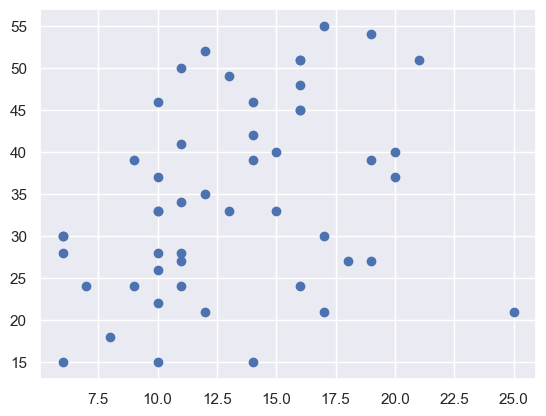

In [46]:
plt.scatter(df['Knowledge score'], df['Wildlife engagement score'])

Correlation coefficient (r): 0.3316810394300971


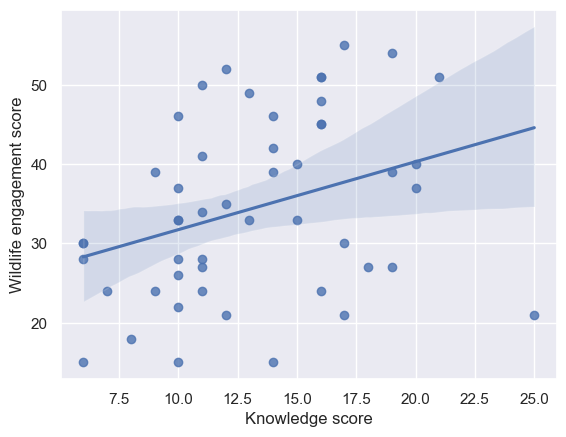

In [47]:
sns.regplot(x="Knowledge score", y="Wildlife engagement score", data=df)

corr_matrix = np.corrcoef((df['Knowledge score'], df['Wildlife engagement score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

In [48]:
portraiture_engagement = df[['Participant', 'T2 Like the post', 'T2 Share the post', 'T2 Research the campaign', 'T2 Visit the WWF website', 
                          'T2 Donate to the WWF', 'PM2 Like the post', 'PM2 Share the post', 'PM2 Research the campaign',
                          'PM2 Visit the WWF website', 'PM2 Donate to the WWF', 'O2 Like the post', 'O2 Share the post',
                          'O2 Research the campaign', 'O2 Visit the WWF website', 'O2 Donate to the WWF']]
portraiture_engagement.head()

,Participant,T2 Like the post,T2 Share the post,T2 Research the campaign,T2 Visit the WWF website,T2 Donate to the WWF,PM2 Like the post,PM2 Share the post,PM2 Research the campaign,PM2 Visit the WWF website,PM2 Donate to the WWF,O2 Like the post,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF
0,1,Very likely,Likely,Very likely,Very likely,Neither likely nor unlikely,Likely,Neither likely nor unlikely,Likely,Likely,Neither likely nor unlikely,Very likely,Likely,Very likely,Very likely,Neither likely nor unlikely
1,2,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely
2,3,Likely,Neither likely nor unlikely,Likely,Likely,Neither likely nor unlikely,Likely,Likely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Likely,Likely,Very likely,Likely,Very likely
3,4,Unlikely,Very unlikely,Unlikely,Very unlikely,Very unlikely,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely
4,5,Likely,Likely,Unlikely,Very unlikely,Very unlikely,Likely,Unlikely,Likely,Unlikely,Very unlikely,Likely,Unlikely,Likely,Unlikely,Very unlikely


In [49]:
def map_portraiture_engagement_scores(row):
  """Maps categorical portraiture engagement scores to numerical scores (1-5).

  Args:
      row: A row (Series) from the DataFrame containing categorical engagement scores.

  Returns:
      A Series containing the corresponding numerical scores for each score.
  """
  scores = row.replace(engagement_score_map)
  return scores

# Apply the function to each row
portraiture_engagement = portraiture_engagement.apply(map_portraiture_engagement_scores, axis=1)
portraiture_engagement.head()

,Participant,T2 Like the post,T2 Share the post,T2 Research the campaign,T2 Visit the WWF website,T2 Donate to the WWF,PM2 Like the post,PM2 Share the post,PM2 Research the campaign,PM2 Visit the WWF website,PM2 Donate to the WWF,O2 Like the post,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF
0,1,5,4,5,5,3,4,3,4,4,3,5,4,5,5,3
1,2,4,3,3,3,2,4,3,3,3,2,4,3,3,3,2
2,3,4,3,4,4,3,4,4,3,3,3,4,4,5,4,5
3,4,2,1,2,1,1,2,1,2,2,1,2,1,2,2,1
4,5,4,4,2,1,1,4,2,4,2,1,4,2,4,2,1


In [50]:
portraiture_engagement_measures = ['T2 Like the post', 'T2 Share the post', 'T2 Research the campaign', 'T2 Visit the WWF website', 
                          'T2 Donate to the WWF', 'PM2 Like the post', 'PM2 Share the post', 'PM2 Research the campaign',
                          'PM2 Visit the WWF website', 'PM2 Donate to the WWF', 'O2 Like the post', 'O2 Share the post',
                          'O2 Research the campaign', 'O2 Visit the WWF website', 'O2 Donate to the WWF']
portraiture_engagement['Portraiture engagement score'] = portraiture_engagement[portraiture_engagement_measures].sum(axis=1)

portraiture_engagement.head()

,Participant,T2 Like the post,T2 Share the post,T2 Research the campaign,T2 Visit the WWF website,T2 Donate to the WWF,PM2 Like the post,PM2 Share the post,PM2 Research the campaign,PM2 Visit the WWF website,PM2 Donate to the WWF,O2 Like the post,O2 Share the post,O2 Research the campaign,O2 Visit the WWF website,O2 Donate to the WWF,Portraiture engagement score
0,1,5,4,5,5,3,4,3,4,4,3,5,4,5,5,3,62
1,2,4,3,3,3,2,4,3,3,3,2,4,3,3,3,2,45
2,3,4,3,4,4,3,4,4,3,3,3,4,4,5,4,5,57
3,4,2,1,2,1,1,2,1,2,2,1,2,1,2,2,1,23
4,5,4,4,2,1,1,4,2,4,2,1,4,2,4,2,1,38


In [51]:
df = pd.merge(df, portraiture_engagement[['Portraiture engagement score', 'Participant']])
df.head()

,Participant,Gender,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,...,O2 Donate to the WWF,Tiger,Proboscis Monkey,Orangutan,Familiar species,Ranked aesthetics,Knowledge score,Empathy score,Wildlife engagement score,Portraiture engagement score
0,1,Female,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,...,Neither likely nor unlikely,0,40,20,Tiger;Proboscis Monkey;Orangutan;,Tiger;Orangutan;Proboscis Monkey;,25,24,21,62
1,2,Female,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,...,Unlikely,20,20,20,Tiger;Orangutan;,Orangutan;Tiger;Proboscis Monkey;,16,26,51,45
2,3,Male,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,...,Very likely,20,10,30,Tiger;Proboscis Monkey;Orangutan;,Orangutan;Proboscis Monkey;Tiger;,17,24,55,57
3,4,Female,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,...,Very unlikely,20,20,20,Tiger;Orangutan;Proboscis Monkey;,Tiger;Proboscis Monkey;Orangutan;,7,23,24,23
4,5,Non-binary,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,...,Very unlikely,20,20,20,Tiger;Orangutan;,Tiger;Proboscis Monkey;Orangutan;,18,22,27,38


Correlation coefficient (r): 0.4293226770162415


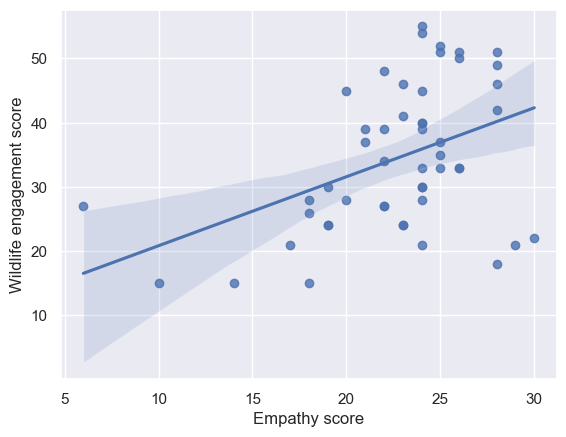

In [52]:
sns.regplot(x="Empathy score", y="Wildlife engagement score", data=df)

corr_matrix = np.corrcoef((df['Empathy score'], df['Wildlife engagement score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

Correlation coefficient (r): 0.34456237867863154


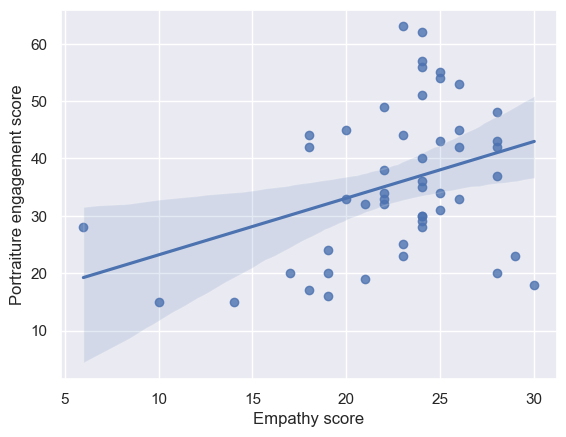

In [53]:
sns.regplot(x="Empathy score", y="Portraiture engagement score", data=df)

corr_matrix = np.corrcoef((df['Empathy score'], df['Portraiture engagement score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

Correlation coefficient (r): 0.6558329390445126


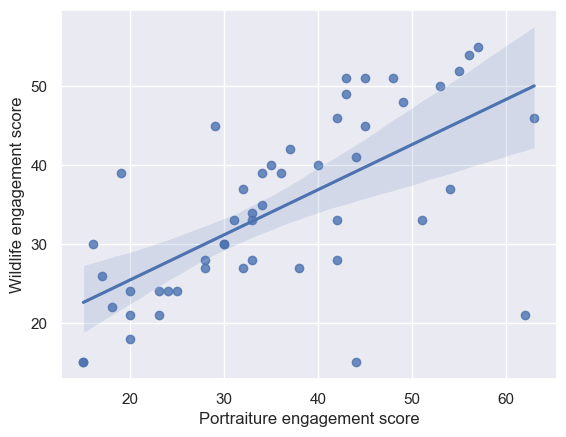

In [54]:
sns.regplot(x="Portraiture engagement score", y="Wildlife engagement score", data=df)

corr_matrix = np.corrcoef((df['Portraiture engagement score'], df['Wildlife engagement score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

Correlation coefficient (r): 0.47068002392695557


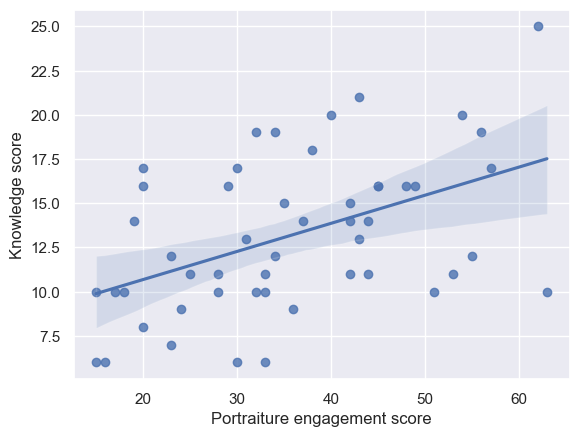

In [55]:
sns.regplot(x="Portraiture engagement score", y="Knowledge score", data=df)

corr_matrix = np.corrcoef((df['Portraiture engagement score'], df['Knowledge score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

Correlation coefficient (r): 0.3316810394300971


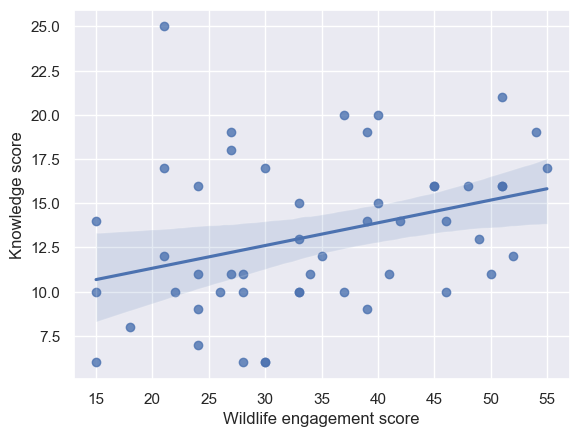

In [56]:
sns.regplot(x="Wildlife engagement score", y="Knowledge score", data=df)

corr_matrix = np.corrcoef((df['Wildlife engagement score'], df['Knowledge score']))
r = corr_matrix[0, 1]
print(f"Correlation coefficient (r): {r}")

In [57]:
t1_media['t1_empathy_ranked'] = t1_media['T1 Empathy'].replace({
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
})

t2_media['t2_empathy_ranked'] = t2_media['T2 Empathy'].replace({
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
})

# Calculate medians using ranked values
median_t1_empathy = np.median(t1_media['t1_empathy_ranked'])
median_t2_empathy = np.median(t2_media['t2_empathy_ranked'])

# Print the medians
print("Median for t1 empathy:", median_t1_empathy)
print("Median for t2 empathy:", median_t2_empathy)
t1_media

Median for t1 empathy: 4.0
Median for t2 empathy: 4.0


,Participant,Age Group,Ethnicity,Climate change,Biodiversity loss,Species conservation,Habitat conservation,WWF conservation efforts,T1 Empathy,T1 Fear,...,T1 Guilty,T1 Content,T1 Relaxed,T1 Empowered,T1 Like the post,T1 Share the post,T1 Research the campaign,T1 Visit the WWF website,T1 Donate to the WWF,t1_empathy_ranked
0,1,18-24,White,Very well informed,Very well informed,Very well informed,Very well informed,Very well informed,Agree,Neither agree nor disagree,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Likely,Very unlikely,Unlikely,Unlikely,Very unlikely,4
1,2,18-24,Mixed or multiple ethnic groups,Well informed,Well informed,Quite informed,Quite informed,Somewhat informed,Agree,Neither agree nor disagree,...,Disagree,Strongly disagree,Strongly disagree,Disagree,Very likely,Likely,Neither likely nor unlikely,Unlikely,Unlikely,4
2,3,18-24,White,Quite informed,Well informed,Well informed,Well informed,Somewhat informed,Agree,Neither agree nor disagree,...,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,Neither likely nor unlikely,4
3,4,18-24,Mixed or multiple ethnic groups,Somewhat informed,Somewhat informed,Uninformed,Uninformed,Uninformed,Agree,Strongly disagree,...,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Unlikely,Very unlikely,Unlikely,Unlikely,Very unlikely,4
4,5,18-24,White,Well informed,Quite informed,Well informed,Very well informed,Somewhat informed,Agree,Disagree,...,Agree,Disagree,Disagree,Disagree,Likely,Unlikely,Very unlikely,Very unlikely,Very unlikely,4
5,6,18-24,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Agree,Neither agree nor disagree,...,Neither agree nor disagree,Disagree,Disagree,Disagree,Very unlikely,Very unlikely,Unlikely,Unlikely,Unlikely,4
6,7,18-24,White,Somewhat informed,Uninformed,Uninformed,Uninformed,Uninformed,Neither agree nor disagree,Disagree,...,Neither agree nor disagree,Disagree,Disagree,Strongly disagree,Likely,Unlikely,Unlikely,Very unlikely,Very unlikely,3
7,8,55-64,White,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Somewhat informed,Agree,Agree,...,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Neither likely nor unlikely,Neither likely nor unlikely,Unlikely,Unlikely,Neither likely nor unlikely,4
8,9,45-54,White,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Uninformed,Strongly agree,Neither agree nor disagree,...,Neither agree nor disagree,Disagree,Disagree,Disagree,Very unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely,5
9,10,18-24,"Black, Black British, Carribean or African",Very well informed,Quite informed,Somewhat informed,Somewhat informed,Somewhat informed,Disagree,Strongly disagree,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Very unlikely,Very unlikely,Very unlikely,Very unlikely,Very unlikely,2


In [58]:
t1_media['t1_empathy_ranked'] = t1_media['T1 Empathy'].replace({
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
})

t2_media['t2_empathy_ranked'] = t2_media['T2 Empathy'].replace({
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
})

# Calculate medians using ranked values
median_t1_empathy = np.median(t1_media['t1_empathy_ranked'])
median_t2_empathy = np.median(t2_media['t2_empathy_ranked'])

# Print the medians
print("Median for t1 empathy:", median_t1_empathy)
print("Median for t2 empathy:", median_t2_empathy)

Median for t1 empathy: 4.0
Median for t2 empathy: 4.0


In [59]:
install nbconvert[webpdf]

SyntaxError: invalid syntax (1604874789.py, line 1)